In [1]:
%matplotlib inline

In [7]:
from pyathena.set_plt import *

In [2]:
import pyathena as pa

In [12]:
ds=pa.AthenaDataSet('/tigress/changgoo/R8_2pc_rst/id0/R8_2pc_rst.0390.vtk')

In [13]:
den=ds.read_all_data('density')

In [14]:
n10=np.zeros_like(den)
ind=den > 10
n10[ind]=den[ind]
n30=np.zeros_like(den)
ind=den > 30
n30[ind]=den[ind]
n100=np.zeros_like(den)
ind=den > 100
n100[ind]=den[ind]

In [58]:
dz=ds.domain['dx'][2]
unit=pa.set_units(muH=1.4271)
to_surf=(unit['density']*unit['length']).to('Msun/pc^2').value

In [59]:
nproj=den.sum(axis=0)*dz*to_surf

n10_proj=n10.sum(axis=0)*dz*to_surf
n30_proj=n30.sum(axis=0)*dz*to_surf
n100_proj=n100.sum(axis=0)*dz*to_surf

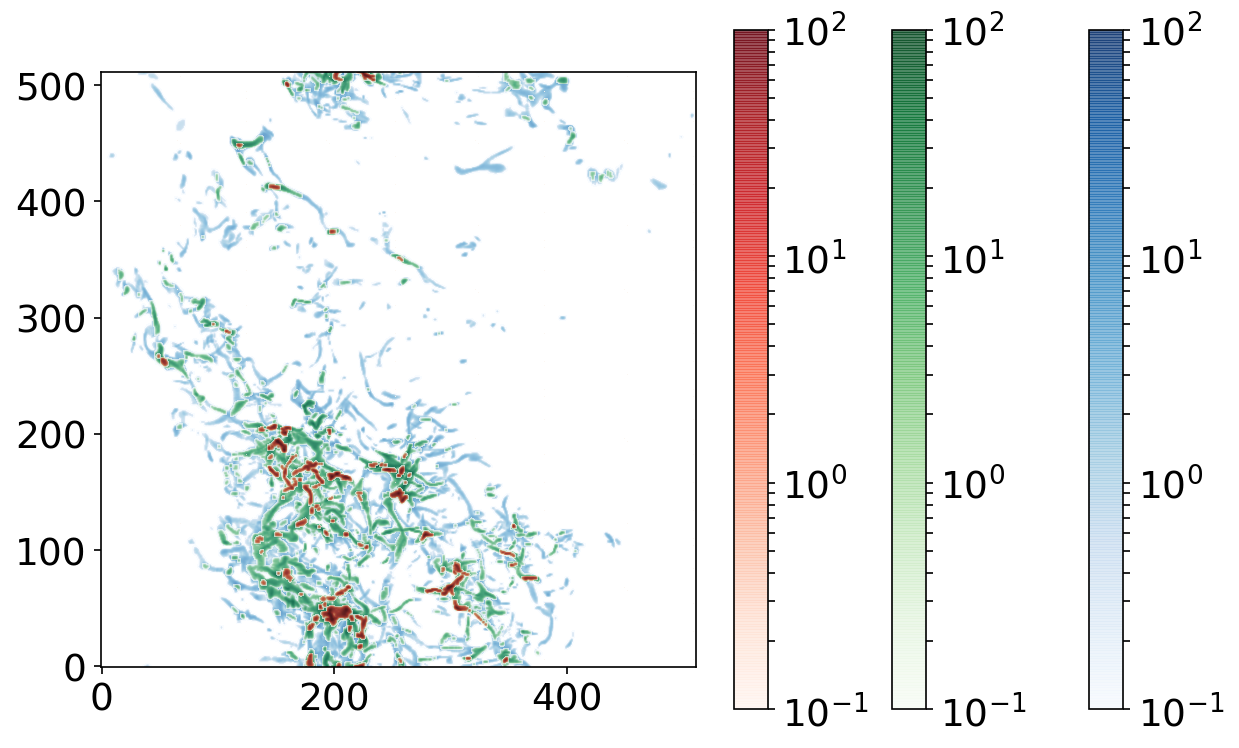

In [63]:
nmin=0.1
nmax=100
im1=plt.imshow(n10_proj,cmap=plt.cm.Blues,alpha=0.7,interpolation='bicubic',origin='lower')
im2=plt.imshow(n30_proj,cmap=plt.cm.Greens,alpha=0.7,interpolation='bicubic',origin='lower')
im3=plt.imshow(n100_proj,cmap=plt.cm.Reds,alpha=0.7,interpolation='bicubic',origin='lower')
for im in [im1,im2,im3]:
    im.set_norm(LogNorm())
    im.set_clim(vmin=nmin,vmax=nmax)
    plt.colorbar(im)